<a href="https://colab.research.google.com/github/Pavun-KumarCH/Agentic-RAG-Systems/blob/main/Llama_Index_ReAct_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Roadmap

Part-4 This video focus:

- Function Calling Agents + Agent Runner
- Agentic RAG
- Project - ReACT Agent: Building a Search Assistant Agent


In [1]:
#@title requirements
%pip install --q llama-index duckduckgo-search
%pip install --q llama-index-llms-mistralai llama-index-embeddings-mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.8/195.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.3/454.3 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.0/260.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.6 MB/s eta 0:00:00


In [2]:
#@title Function Calling
import nest_asyncio, os
from duckduckgo_search import DDGS
from llama_index.core.tools import FunctionTool
from llama_index.llms.mistralai import MistralAI
from llama_index.embeddings.mistralai import MistralAIEmbedding # Agentic RAG

nest_asyncio.apply()

In [3]:
#@title Creating function tools for search

def search(query:str) -> str:
  """
  Args:
      query: user prompt
  return:
  context (str): search results to the user query
  """

  req = DDGS()
  response = req.text(query, max_results =4)
  context = ""
  for result in response:
    context += result['body']
  return context

search_tool = FunctionTool.from_defaults(fn = search)

In [4]:
#@title Setup the Model
from google.colab import userdata
from llama_index.core import Settings

mistral_api = userdata.get("MISTRALAI_API_KEY")
llm = MistralAI(model = "mistral-large-latest", api_key = mistral_api)
embed_model = MistralAIEmbedding(model = "mistral-embed", api_key = mistral_api)

Settings.llm = llm
Settings.embed_model = embed_model

In [5]:
#@title testing llm-api
llm.complete("tell me about AI ?").text

'Artificial Intelligence (AI) is a broad field of computer science dedicated to creating systems that can perform tasks that typically require human intelligence. These tasks include learning, reasoning, problem-solving, perception, and language understanding. AI can be categorized into several types, each with different capabilities and applications:\n\n1. **Narrow or Weak AI**: Designed to perform a narrow task (e.g., facial recognition, internet searches, or driving a car).\n\n2. **General or Strong AI**: Hypothetical AI that possesses the ability to understand, learn, and apply knowledge across various tasks at a level equal to or beyond human capabilities. This type of AI does not yet exist.\n\n3. **Superintelligent AI**: A hypothetical AI that surpasses human intelligence in every economically valuable work. This is still a conceptual idea and not a reality.\n\n### Key Components of AI\n\n1. **Machine Learning (ML)**: A subset of AI that involves training algorithms to learn from

In [6]:
query = "Who was the Man of the Series in India vs Bangalesh 2024 Test Match ?"

In [7]:
function_call = llm.predict_and_call(tools = [search_tool],
                                     user_msg = query,
                                     allow_parallel_tool_calls = True)


In [8]:
type(function_call)

llama_index.core.chat_engine.types.AgentChatResponse

In [9]:
function_call.response

"Ravichandran Ashwin 's impressive performance with both bat and ball in the two-match India vs Bangladesh Test 2024 series won him the Player of the Series award. The all-rounder had a tally of 11 wickets and 114 runs from the two matches that saw him win the coveted award for the 11th time in his Test career.The 312 balls India batted for in this Test is the second-fewest they have faced - and the fourth-fewest overall - to win a Test match, behind the 281 against South Africa in Cape Town earlier ...IND vs BDESH 2024/25, India vs Bangladesh Match Report: Bangladesh captain Najmul Hossain Shanto's 82 kept the bowling at bay, but Ashwin and Ravindra Jadeja shared nine wicketsIndia vs Bangladesh test series 2024 will start on September 19. The Indian cricket team will begin their 2024-25 home season with a two-match test series against Bangladesh.It will be India's first test series at home since their victory over England earlier this year."

# Second Approach for Function Calling Agent
 * Function Calling Agent Worker

In [10]:
from llama_index.core.agent import FunctionCallingAgent, FunctionCallingAgentWorker

In [11]:
agent = FunctionCallingAgent.from_tools(tools = [search_tool],
                                        llm = llm,
                                        verbose = True,
                                        allow_parallel_tool_calls = True)

In [35]:
response = agent.chat(query)

> Running step f1ac2dde-d0f4-4469-8a2e-f0e7494e0d00. Step input: Who was the Man of the Series in India vs Bangalesh 2024 Test Match ?
Thought: The current language of the user is: English. I need to use a tool to help me answer the question.
Action: search
Action Input: {'query': 'Man of the Series in India vs Bangalesh 2024 Test Match'}
Observation: IND vs BDESH 2024/25, India vs Bangladesh Match Report: Jaiswal scored twin fifties as India registered a remarkable win despite two days of no play due to rain in Kanpur Matches ( 12 ) SA vs PAK ...Ravichandran Ashwin 's impressive performance with both bat and ball in the two-match India vs Bangladesh Test 2024 series won him the Player of the Series award. The all-rounder had a tally of 11 wickets and 114 runs from the two matches that saw him win the coveted award for the 11th time in his Test career.India vs Bangladesh test series 2024 will start on September 19. The Indian cricket team will begin their 2024-25 home season with a two

In [36]:
print(response)

Ravichandran Ashwin was the Man of the Series in the India vs Bangladesh 2024 Test Match.


# Third Approach and the Recommended one : Agent Runner

In [13]:
from llama_index.core.agent import AgentRunner

agent_worker = FunctionCallingAgentWorker.from_tools(
    tools = [search_tool],
    llm = llm,
    verbose = True,
    allow_parallel_tool_calls = True
)

agent_runner = AgentRunner(agent_worker)

In [14]:
runner_response = agent_runner.query(query)

Added user message to memory: Who was the Man of the Series in India vs Bangalesh 2024 Test Match ?
=== Calling Function ===
Calling function: search with args: {"query": "Man of the Series in India vs Bangladesh 2024 Test Match"}
=== Function Output ===
Encountered error: https://links.duckduckgo.com/d.js?q=Man+of+the+Series+in+India+vs+Bangladesh+2024+Test+Match&kl=wt-wt&l=wt-wt&p=&s=0&df=&vqd=4-319446967560055003477974472944591774902&bing_market=wt-WT&ex=-1 202 Ratelimit
=== LLM Response ===
I apologize, but I couldn't retrieve the information about the Man of the Series in the India vs Bangladesh 2024 Test Match. Please try again later or check the latest updates from reliable sports news sources.


In [15]:
runner_response.response

"I apologize, but I couldn't retrieve the information about the Man of the Series in the India vs Bangladesh 2024 Test Match. Please try again later or check the latest updates from reliable sports news sources."

In [16]:
# you can also use chat to get response
runner_chat = agent_runner.chat(query)

Added user message to memory: Who was the Man of the Series in India vs Bangalesh 2024 Test Match ?
=== Calling Function ===
Calling function: search with args: {"query": "Man of the Series in India vs Bangladesh 2024 Test Match"}
=== Function Output ===
Ravichandran Ashwin 's impressive performance with both bat and ball in the two-match India vs Bangladesh Test 2024 series won him the Player of the Series award. The all-rounder had a tally of 11 wickets and 114 runs from the two matches that saw him win the coveted award for the 11th time in his Test career.The 312 balls India batted for in this Test is the second-fewest they have faced - and the fourth-fewest overall - to win a Test match, behind the 281 against South Africa in Cape Town earlier ...IND vs BDESH 2024/25, India vs Bangladesh Match Report: Bangladesh captain Najmul Hossain Shanto's 82 kept the bowling at bay, but Ashwin and Ravindra Jadeja shared nine wicketsIndia vs Bangladesh test series 2024 will start on September 

In [17]:
runner_chat.response

'Ravichandran Ashwin was named the Man of the Series in the India vs Bangladesh 2024 Test Match. His outstanding performance with both bat and ball, accumulating 11 wickets and 114 runs across the two matches, earned him the award for the 11th time in his Test career.'

# Agentic RAG
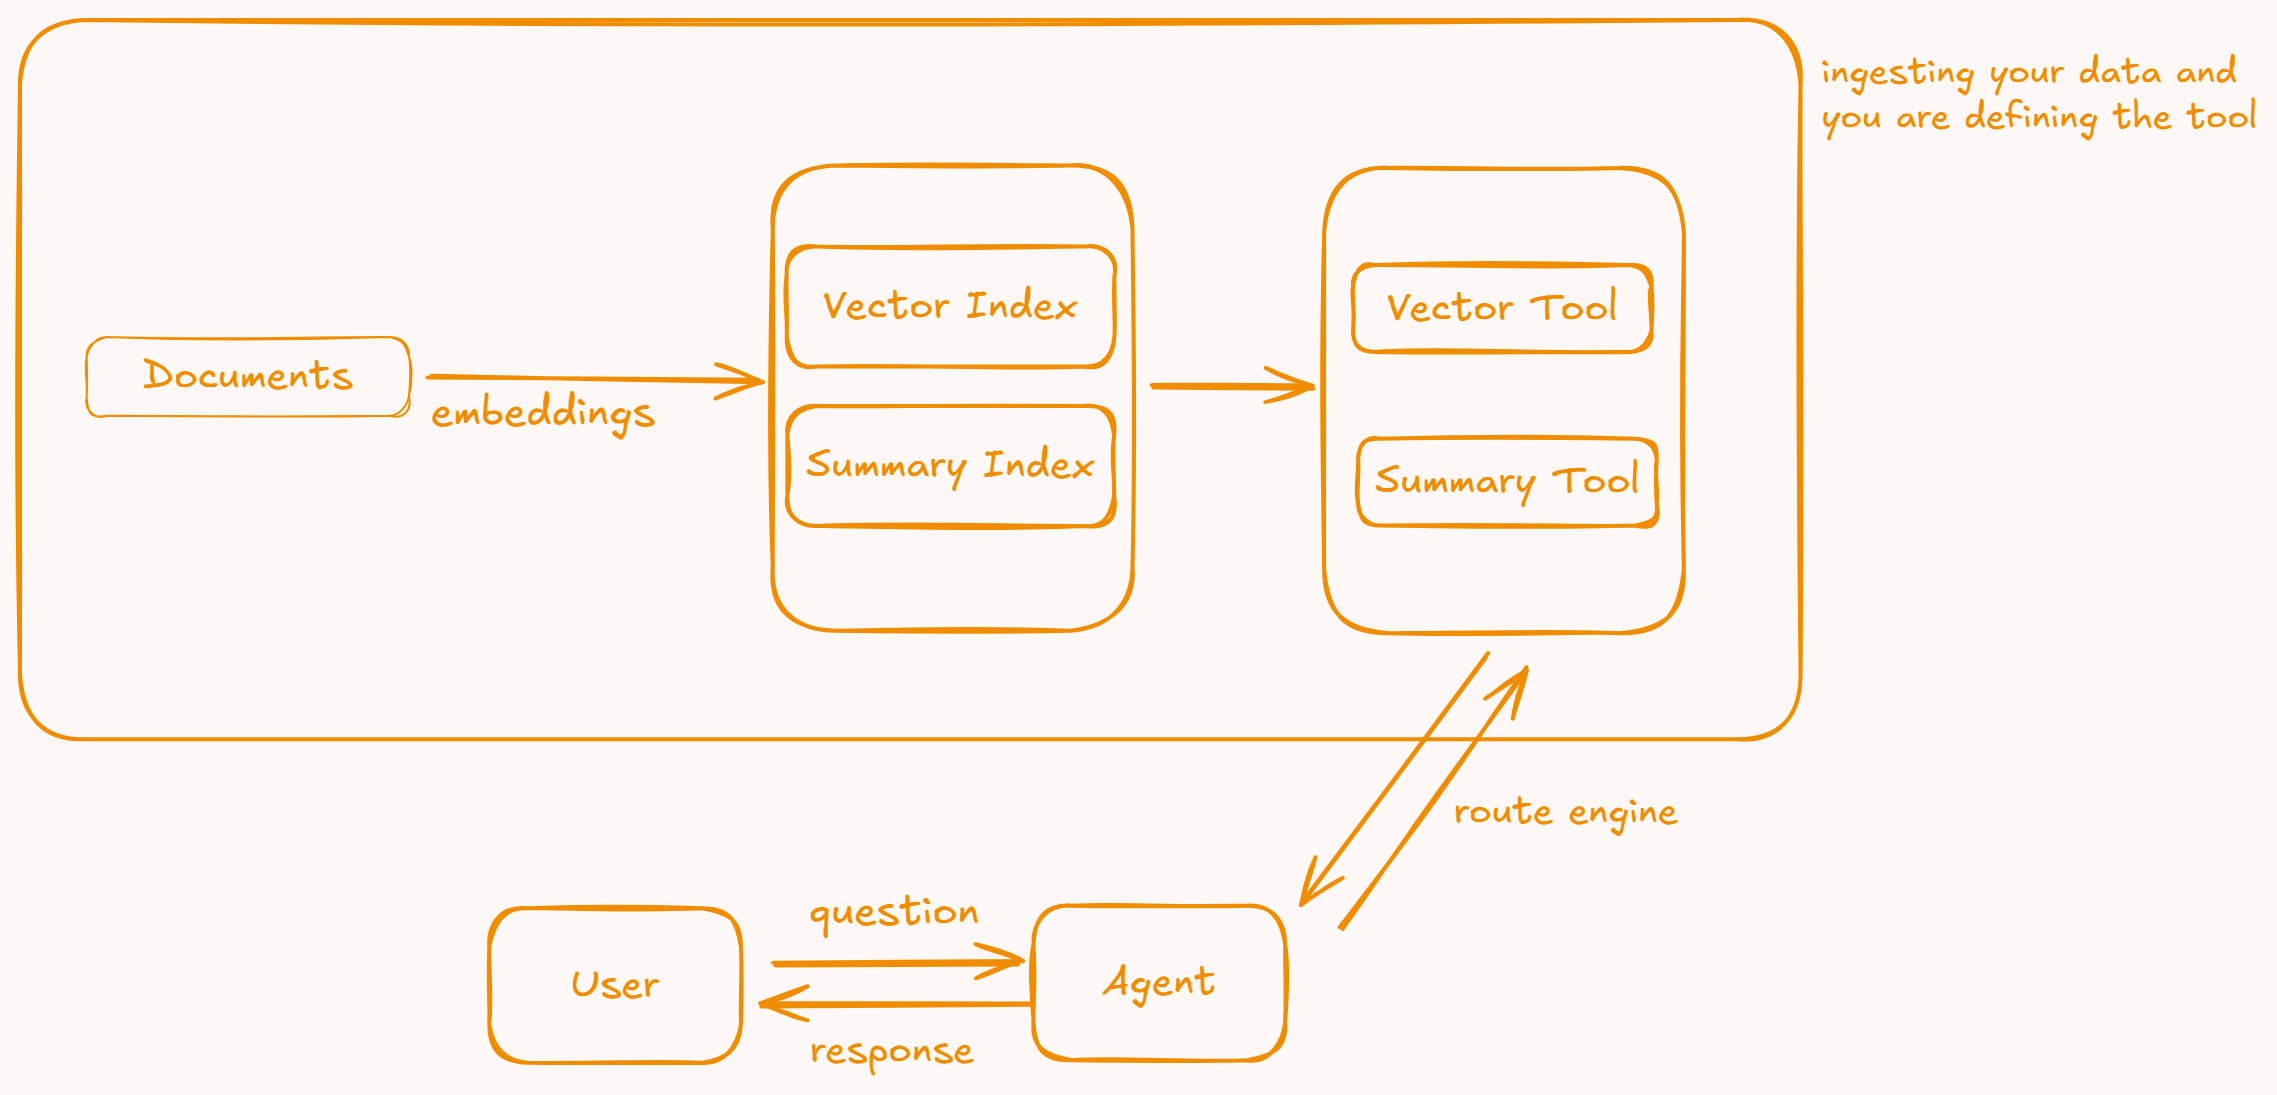


In [18]:
#@title Download Pdf data
!mkdir -p 'data/'
!wget 'https://arxiv.org/pdf/2409.16160.pdf'


--2024-12-21 04:49:29--  https://arxiv.org/pdf/2409.16160.pdf
Resolving arxiv.org (arxiv.org)... 151.101.67.42, 151.101.195.42, 151.101.3.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.67.42|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://arxiv.org/pdf/2409.16160 [following]
--2024-12-21 04:49:29--  http://arxiv.org/pdf/2409.16160
Connecting to arxiv.org (arxiv.org)|151.101.67.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21704565 (21M) [application/pdf]
Saving to: ‘2409.16160.pdf’

2409.16160.pdf      100%[===================>]  20.70M  13.8MB/s    in 1.5s    

2024-12-21 04:49:31 (13.8 MB/s) - ‘2409.16160.pdf’ saved [21704565/21704565]



In [19]:
#@title Load the documents
from llama_index.core import SimpleDirectoryReader

documents = SimpleDirectoryReader(input_files = ["/content/data/2409.16160.pdf"]).load_data()

In [20]:
#@title Text Splitter in chunks
from llama_index.core.node_parser import SentenceSplitter

splitter = SentenceSplitter(chunk_size = 1024)
nodes = splitter.get_nodes_from_documents(documents)

In [22]:
#@title Indexing Ingestion
from llama_index.core import SummaryIndex, VectorStoreIndex

summary_index = SummaryIndex(nodes)
vector_index = VectorStoreIndex(nodes)

In [26]:
#@title create query engines
summary_query_engine = summary_index.as_query_engine(response_mode = "tree_summarize", use_async = True)
vector_query_engine = vector_index.as_query_engine()

In [27]:
from llama_index.core.tools import QueryEngineTool
from llama_index.core.selectors import LLMSingleSelector
from llama_index.core.query_engine.router_query_engine import RouterQueryEngine

summary_tool = QueryEngineTool.from_defaults(
    query_engine = summary_query_engine,
    description = ("This Agent is useful to summarize the Research paper in a simplied way by giving intuitions")
)

vector_tool = QueryEngineTool.from_defaults(
    query_engine = vector_query_engine,
    description = ("This Agent is useful to answer to the user queries within the paper and retrieve the relevant piece of information")
)

In [28]:
query_engine = RouterQueryEngine(
    selector = LLMSingleSelector.from_defaults(),
    query_engine_tools = [summary_tool, vector_tool],
    verbose = True)

In [29]:
response = query_engine.query("give me technical architecture details in the paper")

Selecting query engine 1: The question asks for specific details within the paper, which aligns with the capability of retrieving relevant pieces of information..


In [30]:
print(response)

The technical architecture presented in the paper involves a framework that decomposes a video clip into three spatial components: the main human, the underlying scene, and floating occlusions. These components are organized in hierarchical layers based on 3D depth. The human component is further disentangled into identity and motion properties using canonical appearance transfer and structured body codes. These properties are then encoded into identity code (Cid) and motion code (Cmo). The scene and occlusion components are embedded with a shared Variational Autoencoder (VAE) encoder and reorganized as a full scene code (Cso).

These latent codes (Cid, Cmo, and Cso) are inserted into a diffusion-based decoder as conditions for video reconstruction. This architecture allows for controllable synthesis of various attributes and 3D-aware composition of the main object, foreground, and background. The framework enables flexible user controls and handles challenging cases of complicated 3D 

In [31]:
response_2 = query_engine.query("summarize the methodology from the paper")

Selecting query engine 0: The question asks for a summary of the methodology from the paper, which aligns with the capability of summarizing the research paper in a simplified way by giving intuitions..


In [ ]:
print(response_2)

The methodology presented in the paper introduces a novel framework called MIMO for controllable character video synthesis. The core idea is to decompose a 2D video into spatial components considering the inherent 3D nature of video occurrence. Here's a summarized breakdown of the methodology:

1. **Spatial Decomposition**: The video is split into three main components: the main human subject, the underlying scene, and floating occlusions (foreground objects). This is achieved by lifting 2D pixels into 3D using monocular depth estimators and then decomposing the video clip into hierarchical layers based on 3D depth.

2. **Encoding Spatial Components**:
   - **Human Component**: This is further disentangled into identity and motion codes. The identity is captured using a canonical appearance transfer, while the motion is encoded via structured body codes anchored to a deformable human body model (SMPL).
   - **Scene and Occlusion Components**: These are embedded using a shared VAE encod

# ReAct Agent
- Build a simple project Search Assistant Agent.

In [32]:
from llama_index.core.agent import ReActAgent

agent = ReActAgent.from_tools(tools = [search_tool],
                              llm = llm,
                              verbose = True,
                              allow_parallel_tool_call = True)

In [33]:
response = agent.chat("Tell me about Elon Musk ?")

> Running step e8d898f4-3dc7-4b2f-b4bd-715e30698120. Step input: Tell me about Elon Musk ?
Thought: The current language of the user is: English. I need to use a tool to help me answer the question.
Action: search
Action Input: {'query': 'Elon Musk'}
Observation: Elon Reeve Musk was born on June 28, 1971, in Pretoria, South Africa's administrative capital. [3] [4] He is of British and Pennsylvania Dutch ancestry.[5] [6] His mother, Maye (née Haldeman), is a model and dietitian born in Saskatchewan, Canada, and raised in South Africa.[7] [8] [9] His father, Errol Musk, is a South African electromechanical engineer, pilot, sailor, consultant, emerald ...Elon Musk is the founder of SpaceX and Tesla Motors, among other companies. Their success has propelled him to become the richest person in the world, with a net worth greater than $450 billion.Elon Musk's role in taking down a bipartisan budget deal shows his ascendance as a political force. The social media warnings from the world's wea

In [34]:
print(response)

Elon Reeve Musk was born on June 28, 1971, in Pretoria, South Africa. He is the founder of SpaceX and Tesla Motors, among other companies. Their success has propelled him to become the richest person in the world, with a net worth greater than $450 billion.
